# Exercise 2
## Time Series Analysis & Recurrent Neural Networks, SoSe 2021
### Author: Elias Olofsson
    Version information:
        2021-05-05: v.1.0. First public release. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('image', cmap='gray')

from sklearn.linear_model import LinearRegression

# Produce inline vector graphics
%config InlineBackend.figure_format = 'svg'

## Task 1: AR(p) models

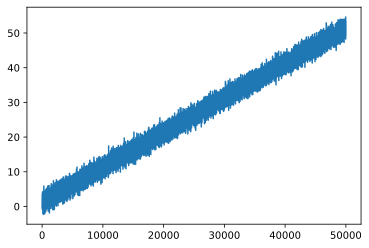

In [2]:
# Loading the time series.
data = np.loadtxt('Tut2_file1.txt')

# Plotting the raw data
plt.plot(data)
plt.show()

In [3]:
def AR_fit(x, p):
    """
    Estimate the parameters of an Auto-regressive (AR) model 
    of order p on a scalar time series x.
    
    Parameters:
    -----------
    x: np.array shape=(T,)
        Scalar valued time series.
    p: int
        Order of the AR process.

    Returns:
    --------
    coef: np.array shape=(p,)
        Coefficient estimates of the AR(p) model.
    """
    T = len(x)
    y = x[p:] # target vector

    # Regressor matrix
    X = np.zeros((T-p, p+1))    # pre-allocation
    X[:,0] = 1                  # absorbing intercept by a column of ones.
    for i in range(1, p+1):
        X[:,i] = x[p-i:T-i]     # building the regressor matrix

    # Linear regression.
    reg = LinearRegression().fit(X, y)
    return reg.coef_

In [4]:
# Coefficient estimation of AR(1) model on raw data.
print(AR_fit(data, 1))

[0.         0.99702754]


In [5]:
# Fitting linear model to TS.
X = np.vstack((np.ones(len(data)), np.arange(len(data)))).T
reg = LinearRegression().fit(X, data)
print(reg.coef_)

[0.         0.00100007]


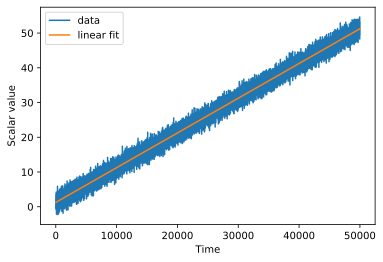

In [6]:
# Visualizing the linear fit.
plt.plot(data, label='data')
plt.plot(X[:,1], reg.predict(X), label='linear fit')
plt.xlabel('Time')
plt.ylabel('Scalar value')
plt.legend()
plt.show()

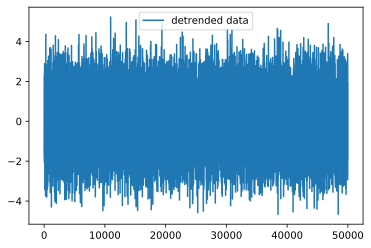

In [7]:
# Detrending the TS
data_detrend = data - reg.predict(X)
plt.plot(data_detrend, label='detrended data')
plt.legend()
plt.show()

In [8]:
# Coefficient estimation of AR(1) model on detrended data.
print(AR_fit(data_detrend, 1))

[0.         0.60289581]


In [9]:
def AR1_step(x0, coef):
    """
    Take a single AR(1) step.
    """
    return coef.dot(np.array([1, x0])) + np.random.normal()

def stepping(n_steps, method, x0, coef):
    """
    Step n_steps into the future following the select method.
    """
    x = x0
    for i in range(n_steps):
        x = method(x0, coef)
    return x

In [10]:
def future_stepping(x, n_steps, method, coef):
    """
    Estimating n_steps future steps following an AR(p) model, starting at each timestep
    from true inital data. Calculates and returns the total squared residual average.
    """
    # Organisation and pre-allocation.
    x_init    = x[:-n_steps]
    x_truth   = x[n_steps:]
    x_predict = np.zeros_like(x_init)

    # For each timestep, estimate n_steps into the future.
    for i in range(len(x_init)):
        x_predict[i] = stepping(n_steps, method, x_init[i], coef)

    # Calculate squared residual average.
    residual = np.mean((x_predict - x_truth)**2)
    return residual, x_truth, x_predict

Average squared residual = 3.924016700358842


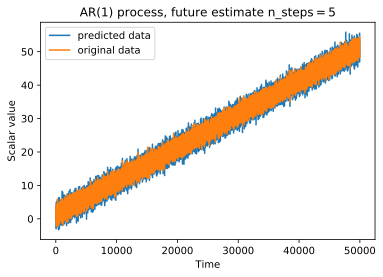

In [11]:
p = 1
coef_data = AR_fit(data, p) # Get AR(p) coefficients on original data.

n_steps = 5
residual, x_truth, x_predict = future_stepping(data, n_steps, AR1_step, coef_data)
print(f"Average squared residual = {residual}")

plt.plot(x_predict, label='predicted data')
plt.plot(x_truth, label='original data')
plt.xlabel('Time')
plt.ylabel('Scalar value')
plt.title(f'AR({p}) process, future estimate n_steps$={n_steps}$')
plt.legend()
plt.show()

Average squared residual = 2.229975627568902


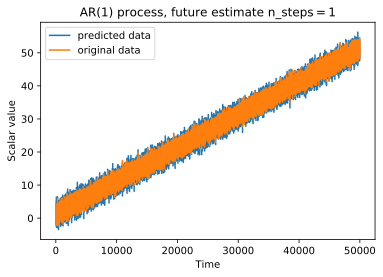

In [12]:
n_steps = 1
residual, x_truth, x_predict = future_stepping(data, n_steps, AR1_step, coef_data)
print(f"Average squared residual = {residual}")

plt.plot(x_predict, label='predicted data')
plt.plot(x_truth, label='original data')
plt.xlabel('Time')
plt.ylabel('Scalar value')
plt.title(f'AR({p}) process, future estimate n_steps$={n_steps}$')
plt.legend()
plt.show()

## Task 2: Estimating an AR(1) model